In [63]:
# Librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
# Crear un conjunto de datos sintético
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [33]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

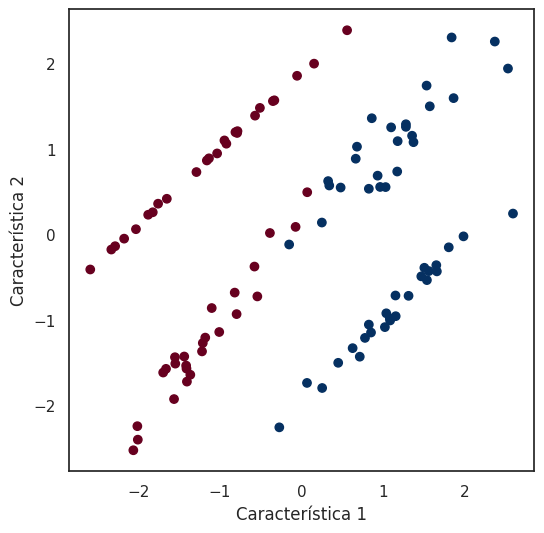

In [34]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, marker='o')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

In [35]:
# Inicializar y entrenar un modelo de regresión logística
model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [36]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [37]:
model.predict_proba(X_test)

array([[9.86040871e-01, 1.39591294e-02],
       [6.07460426e-02, 9.39253957e-01],
       [1.76502753e-02, 9.82349725e-01],
       [9.46922684e-01, 5.30773161e-02],
       [1.45140608e-02, 9.85485939e-01],
       [7.23115714e-01, 2.76884286e-01],
       [9.54320903e-01, 4.56790971e-02],
       [9.69564581e-01, 3.04354194e-02],
       [3.36230581e-04, 9.99663769e-01],
       [4.23288092e-01, 5.76711908e-01],
       [6.00881152e-03, 9.93991188e-01],
       [7.68770456e-01, 2.31229544e-01],
       [1.35616242e-02, 9.86438376e-01],
       [9.77425068e-01, 2.25749323e-02],
       [9.52193344e-01, 4.78066561e-02],
       [4.95068496e-03, 9.95049315e-01],
       [6.28953527e-03, 9.93710465e-01],
       [2.62947148e-03, 9.97370529e-01],
       [9.27356632e-01, 7.26433683e-02],
       [9.87139124e-01, 1.28608761e-02]])

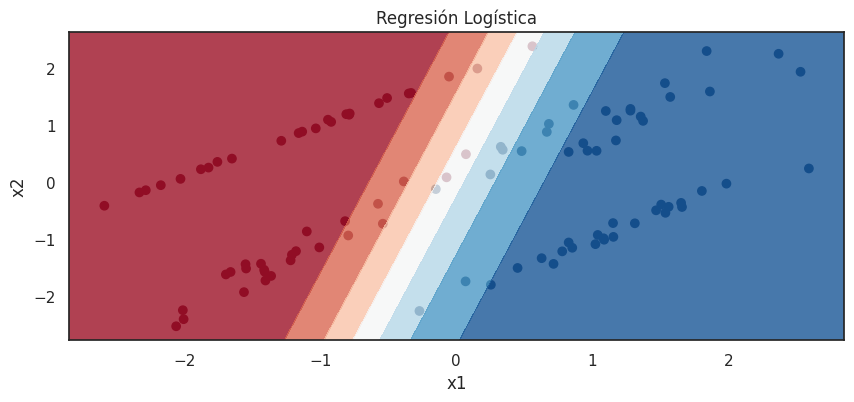

In [38]:
# Visualizar los datos y la frontera de decisión del modelo
plt.figure(figsize=(10, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, marker='o')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Regresión Logística')
plt.show()

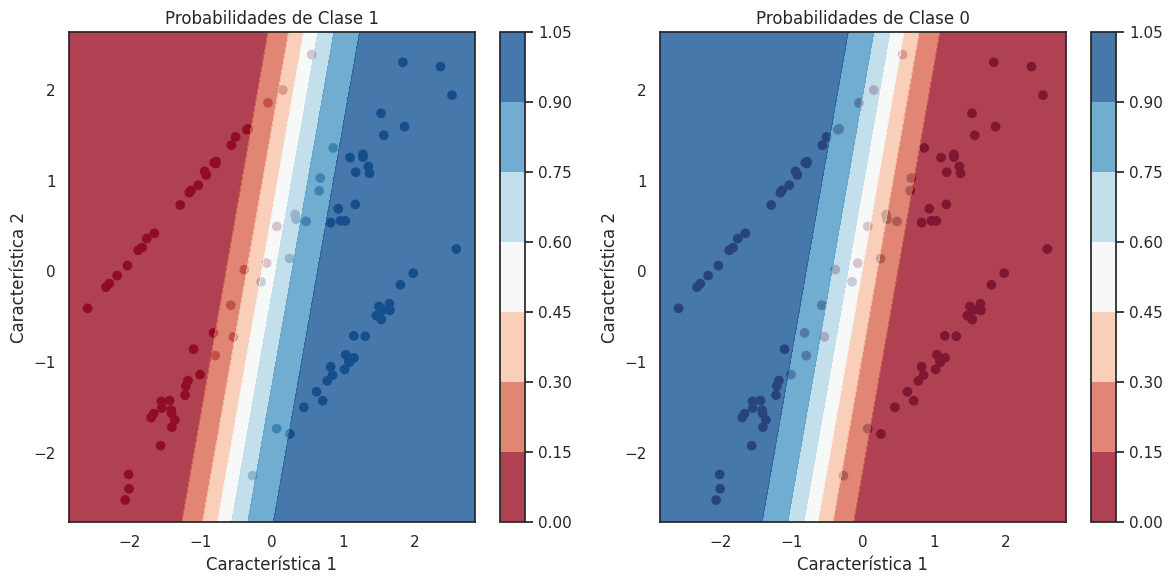

In [39]:
# Visualizar los datos y la frontera de decisión del modelo con probabilidades
plt.figure(figsize=(12, 6))

# Graficar las probabilidades de pertenencia a la clase 1 (positiva)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, marker='o')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.colorbar()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Probabilidades de Clase 1')

# Graficar las probabilidades de pertenencia a la clase 0 (negativa)
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, marker='o')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.colorbar()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Probabilidades de Clase 0')

plt.tight_layout()
plt.show()

In [40]:
model.coef_

array([[ 3.06127461, -0.68478105]])

In [41]:
model.intercept_

array([0.23246397])

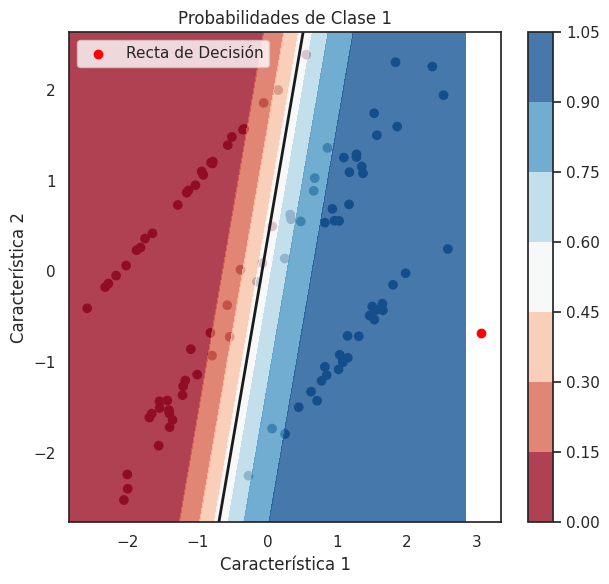

In [42]:
# Obtener los coeficientes del modelo para la recta de decisión
coef = model.coef_
intercept = model.intercept_

# Visualizar los datos y la frontera de decisión del modelo con probabilidades y recta
plt.figure(figsize=(12, 6))

# Graficar las probabilidades de pertenencia a la clase 1 (positiva)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, marker='o')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.colorbar()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Probabilidades de Clase 1')

# Graficar la recta de decisión
plt.contour(xx, yy, model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0], linewidths=2, colors='k')
plt.scatter(coef[0][0], coef[0][1], marker='o', color='red', label='Recta de Decisión')
plt.legend()

plt.tight_layout()
plt.show()

# Ejemplo: *Clasificación de Vidrios*

In [64]:
# Importar el dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values('al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


- RI: índice de refracción
- Na: Sodio (unidad de medida: porcentaje en peso en el óxido correspondiente, - al igual que los atributos 4-10)
- Mg: Magnesio
- Aluminio: Aluminio
- Si: Silicio
- K: potasio
- Ca: Calcio
- Ba: Bario
- Fe: Hierro
- Tipo de vidrio: (atributo de clase)
 - 1 edificio_windows_float_processed
 - 2 building_windows_non_float_processed
 - 3 vehículos_ventanas_flotantes_procesadas
 - 4 Vehicle_windows_non_float_processed (ninguno en esta base de datos)
 - 5 contenedores
 - 6 vajillas
 - 7 faros

<ipython-input-65-5c8594809148>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="glass_type", y="al",


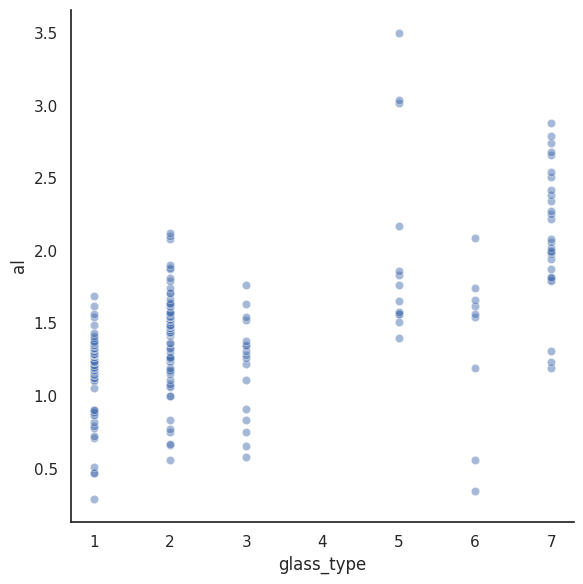

In [65]:
# Ploteos de las clases vs algún feature
sns.set(style="white")

sns.relplot(x="glass_type", y="al",
            sizes=(40, 400), alpha=.5, palette="bright",
            height=6, data=glass)

In [45]:
# Breve repaso de posible desbalanceo
glass.glass_type.value_counts().sort_index()

,count
glass_type,
1,70
2,76
3,17
5,13
6,9
7,29


A modo de resumen, podemos decir:
- Clases 1, 2 y 3 -> Ventanas
- Clases 5, 6 y 7 -> Vajilla

In [68]:
# Re-clasificamos
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0


<ipython-input-47-24f4541ed728>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="household", y="al",


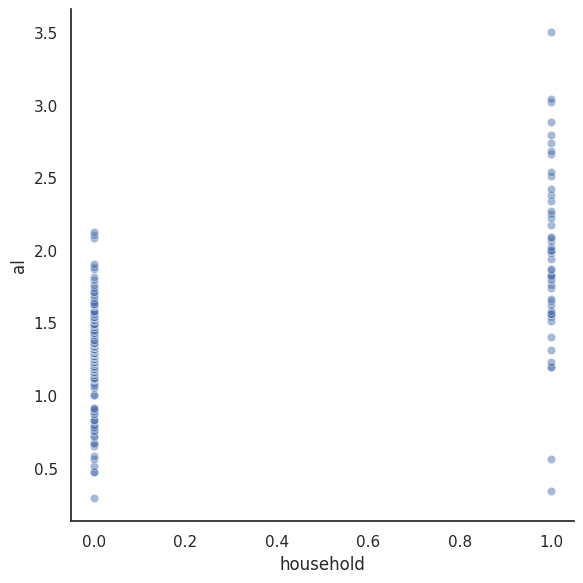

In [47]:
# Ploteo de algún feature vs. nueva clase
sns.set(style="white")

sns.relplot(x="household", y="al",
            sizes=(40, 400), alpha=.5, palette="bright",
            height=6, data=glass)
plt.show()

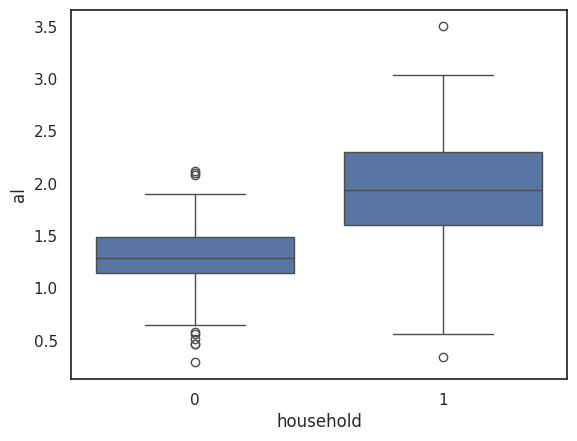

In [62]:
## gráfico similar pero en forma de boxplot
sns.boxplot(x="household", y="al", data=glass)
plt.show()

In [71]:
# Se define el modelo de Regresión Logística
logreg = LogisticRegression()
logreg_2D = LogisticRegression() ## solo para poder graficar bien!

In [72]:
X = glass.drop(['household', 'glass_type'], axis = 1)
y = glass['household']
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
feature_cols = ['al', 'na']
X_2D = glass[feature_cols]
y_2D = glass.household

X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(X_2D, y_2D, test_size=0.2, random_state=42)

In [74]:
# Modelos con TODOS sus features
logreg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logreg.predict(X_test)

In [77]:
logreg.predict_proba(X_test)

array([[9.95234542e-01, 4.76545828e-03],
       [5.15230568e-01, 4.84769432e-01],
       [9.75520819e-01, 2.44791813e-02],
       [6.50101971e-01, 3.49898029e-01],
       [8.72632024e-01, 1.27367976e-01],
       [4.25835723e-01, 5.74164277e-01],
       [9.23048537e-01, 7.69514627e-02],
       [9.43737706e-01, 5.62622935e-02],
       [9.81415930e-01, 1.85840702e-02],
       [9.52391512e-01, 4.76084885e-02],
       [4.25585402e-03, 9.95744146e-01],
       [8.59174097e-01, 1.40825903e-01],
       [9.56441544e-01, 4.35584558e-02],
       [9.68564680e-01, 3.14353200e-02],
       [5.24405328e-04, 9.99475595e-01],
       [9.24963061e-01, 7.50369387e-02],
       [2.81751201e-03, 9.97182488e-01],
       [9.93957840e-01, 6.04216025e-03],
       [9.86045348e-01, 1.39546520e-02],
       [9.28956921e-01, 7.10430789e-02],
       [9.64943412e-01, 3.50565876e-02],
       [6.07659251e-03, 9.93923407e-01],
       [3.38159780e-02, 9.66184022e-01],
       [6.29512512e-02, 9.37048749e-01],
       [9.409468

In [76]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [78]:
# Modelos con SOLO DOS de sus features
logreg_2D.fit(X_train_2D, y_train_2D)

# Realizar predicciones en el conjunto de prueba
y_pred_2D = logreg_2D.predict(X_test_2D)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


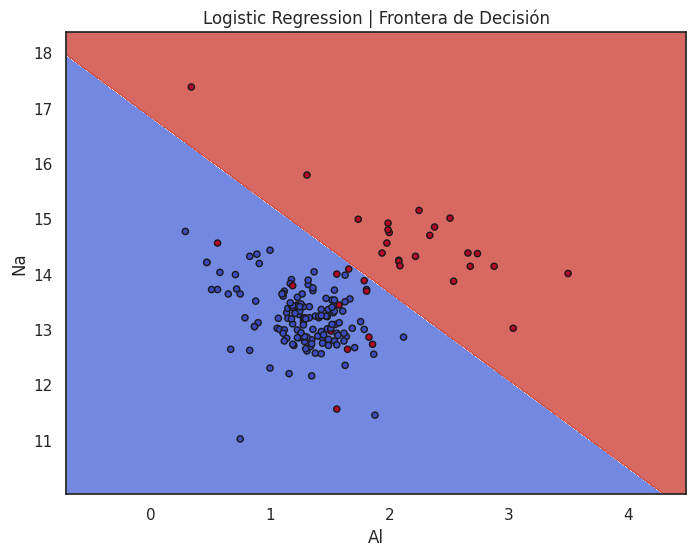

In [81]:
# Assuming X_train_2D is a DataFrame with two columns
X_train_2D_values = X_train_2D.values

# Define the mesh grid for plotting the decision boundary
x_min, x_max = X_train_2D_values[:, 0].min() - 1, X_train_2D_values[:, 0].max() + 1
y_min, y_max = X_train_2D_values[:, 1].min() - 1, X_train_2D_values[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = logreg_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2D_values[:, 0], X_train_2D_values[:, 1], c=y_train,
            cmap=plt.cm.coolwarm, edgecolors='k', s=20)
plt.xlabel('Al')
plt.ylabel('Na')
plt.title('Logistic Regression | Frontera de Decisión')
plt.show()

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calcular métricas
accuracy_logreg = accuracy_score(y_test, y_pred)
accuracy_logreg_2D = accuracy_score(y_test_2D, y_pred_2D)

confusion_matrix_logreg = confusion_matrix(y_test, y_pred)
confusion_matrix_logreg_2D = confusion_matrix(y_test_2D, y_pred_2D)

classification_report_logreg = classification_report(y_test, y_pred)
classification_report_logreg_2D = classification_report(y_test_2D, y_pred_2D)

# Imprimir métricas
print("Métricas para logreg:")
print(f'Exactitud: {accuracy_logreg}')
print("Matriz de confusión:")
print(confusion_matrix_logreg)
print("Reporte de clasificación:")
print(classification_report_logreg)

print("\nMétricas para logreg_2D:")
print(f'Exactitud: {accuracy_logreg_2D}')
print("Matriz de confusión:")
print(confusion_matrix_logreg_2D)
print("Reporte de clasificación:")
print(classification_report_logreg_2D)

Métricas para logreg:
Exactitud: 0.8837209302325582
Matriz de confusión:
[[26  1]
 [ 4 12]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        27
           1       0.92      0.75      0.83        16

    accuracy                           0.88        43
   macro avg       0.89      0.86      0.87        43
weighted avg       0.89      0.88      0.88        43


Métricas para logreg_2D:
Exactitud: 0.8604651162790697
Matriz de confusión:
[[26  1]
 [ 5 11]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.92      0.69      0.79        16

    accuracy                           0.86        43
   macro avg       0.88      0.83      0.84        43
weighted avg       0.87      0.86      0.86        43



- Precisión (Accuracy): Es la proporción de predicciones correctas realizadas por el modelo sobre el total de predicciones realizadas.
    - Correctas / Totales

- Recall (Recall o Sensibilidad): Es la proporción de instancias positivas que el modelo predijo correctamente respecto a todas las instancias positivas reales.
    - VP / (VP + FN)

- F1-score: Es la media armónica de precisión y recall. Proporciona una medida única que combina ambos aspectos del rendimiento del modelo.
    - Precisión x Recall / (Precisión + Recall)

- Soporte (Support): Es el número de instancias en el conjunto de datos que pertenecen a cada clase. Ayuda a entender cuán representativas son las muestras de cada clase.

<ipython-input-55-5f88ee107bf5>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="al", y="household",


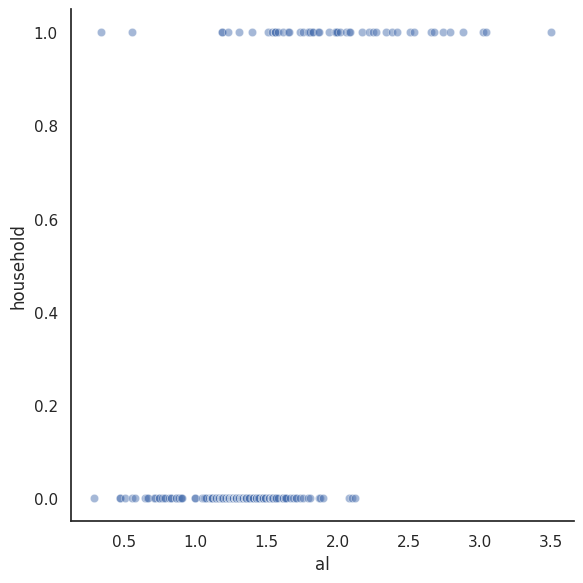

In [55]:
# Supongamos que ahora sólo queremos entrenar en función de un sólo feature
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

sns.set(style="white")

sns.relplot(x="al", y="household",
            sizes=(40, 400), alpha=.5, palette="bright",
            height=6, data=glass)
plt.show()

In [56]:
# Entrenamos nuevamente un modelo de Regresión Logística
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred_class
id,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,0


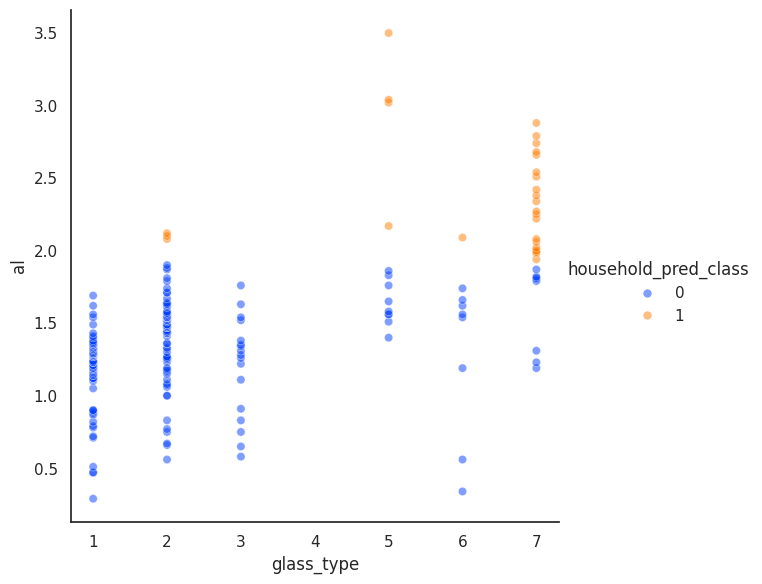

In [57]:
# Ploteo de las predicciones en función de la clase
sns.set(style="white")

sns.relplot(x="glass_type", y="al", hue="household_pred_class",
            sizes=(40, 400), alpha=.5, palette="bright",
            height=6, data=glass)
plt.show()

In [58]:
# Probabilidades de predicción
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred_class,household_pred_prob
id,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,0,0.006027
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,0,0.007035
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,0,0.010510
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,0,0.010510
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,0,0.011888


Text(0, 0.5, 'household')

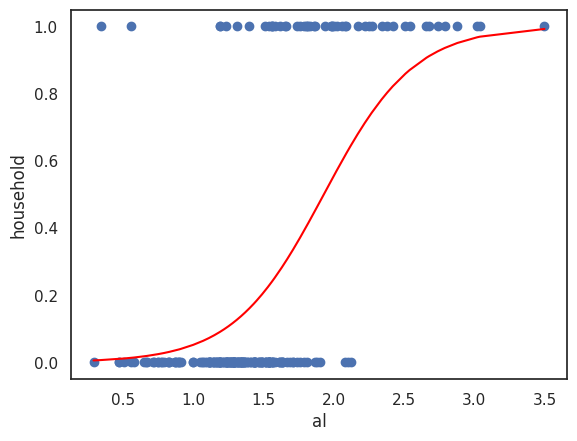

In [59]:
# Ploteo de las probabilidades
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')